In [46]:
import numpy as np
import pandas as pd

In [47]:
import pickle

# Load the dataframe from the pickle file
with open('vectorized_data.pkl', 'rb') as f:
    df_vectorized = pickle.load(f)

# Verify the data
print(df_vectorized.head())


                                                text  Number of Words  \
0  [-0.5290401, 1.3665133, -0.80768013, -0.391093...             71.0   
1  [-0.27918544, 0.26646057, -2.0142102, 0.874655...             35.0   
2  [-0.85621387, 0.5165809, -1.5286032, 0.0605149...            115.0   
3  [-0.2679573, 1.6229212, -0.97719175, 0.5954116...             71.0   
4  [-1.3925172, 1.2192382, -1.3127025, 0.8323619,...             55.0   

   Number of Unique Words  Lexical Diversity  label                    labels  
0                    57.0           1.245614     10          rec.sport.hockey  
1                    29.0           1.206897      3  comp.sys.ibm.pc.hardware  
2                    93.0           1.236559     17     talk.politics.mideast  
3                    40.0           1.775000      3  comp.sys.ibm.pc.hardware  
4                    40.0           1.375000      4     comp.sys.mac.hardware  


In [48]:
# Create a DataFrame from the 300-dimensional text vector
text_vectors = np.stack(df_vectorized['text'])
text_df = pd.DataFrame(text_vectors, columns=[f'text_feature_{i}' for i in range(1,301)])

In [49]:
text_df

,text_feature_1,text_feature_2,text_feature_3,text_feature_4,text_feature_5,text_feature_6,text_feature_7,text_feature_8,text_feature_9,text_feature_10,...,text_feature_291,text_feature_292,text_feature_293,text_feature_294,text_feature_295,text_feature_296,text_feature_297,text_feature_298,text_feature_299,text_feature_300
0,-0.529040,1.366513,-0.807680,-0.391093,0.556891,0.331544,1.807316,2.714442,-2.612218,-0.075514,...,1.684348,-1.129226,1.550328,0.157012,-1.369549,-0.233906,1.018852,0.300667,-1.962461,0.290608
1,-0.279185,0.266461,-2.014210,0.874655,2.001537,-0.535391,1.380789,2.109462,-3.023489,-0.260620,...,0.487771,0.064291,0.144577,0.208926,-1.064808,0.246307,0.807237,-1.064619,-1.719875,0.743530
2,-0.856214,0.516581,-1.528603,0.060515,2.280041,0.532967,1.277382,2.651986,-1.052777,0.310467,...,1.784927,-0.473679,0.256193,-0.448327,-1.533778,-0.039482,0.784111,0.309479,-1.090555,1.068606
3,-0.267957,1.622921,-0.977192,0.595412,2.160348,0.218418,0.638600,3.136519,-2.452479,-0.193923,...,0.115210,0.138336,0.126363,0.529545,-0.029485,2.168380,-0.827677,-3.357024,-0.045534,1.829613
4,-1.392517,1.219238,-1.312703,0.832362,1.833941,0.253066,1.250301,3.711750,-3.129509,0.801260,...,0.938145,-0.355510,0.904905,-0.021950,-0.325176,-0.583913,-0.526114,-0.833042,-1.447465,1.027189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18841,0.081482,1.300209,-1.430490,0.081386,1.254414,-0.732815,1.323335,3.150269,-2.189784,0.580509,...,1.451453,-1.023552,2.305305,-1.023903,-1.194132,-0.242372,0.574178,-1.041952,-2.033468,1.528738
18842,-1.123459,0.402567,-1.458515,2.001488,2.275669,-2.466568,2.533670,3.563533,-2.491650,0.706272,...,0.498268,0.276353,2.204401,-2.118853,-2.320965,0.844922,0.988037,-2.280889,-2.498724,0.377307
18843,-0.806958,2.226107,-2.340649,2.700698,1.503375,0.837379,1.849937,5.135254,-2.180741,0.305510,...,0.196345,1.132956,-0.046711,0.186622,-0.777530,2.187178,0.490825,-1.289197,-2.039326,1.422640
18844,0.245300,2.751035,-1.687650,-0.209340,2.579864,1.104067,1.084535,3.142964,-2.297940,0.830064,...,0.710421,-0.843718,1.702891,-0.886655,-0.886455,0.063011,-0.246446,-0.130195,-2.599871,1.165472


In [50]:
df_combined = pd.concat([df_vectorized.reset_index(drop=True), text_df], axis=1)


In [51]:
df_combined.drop(columns=['text'], inplace=True)


In [52]:
df_combined

,Number of Words,Number of Unique Words,Lexical Diversity,label,labels,text_feature_1,text_feature_2,text_feature_3,text_feature_4,text_feature_5,...,text_feature_291,text_feature_292,text_feature_293,text_feature_294,text_feature_295,text_feature_296,text_feature_297,text_feature_298,text_feature_299,text_feature_300
0,71.0,57.0,1.245614,10,rec.sport.hockey,-0.529040,1.366513,-0.807680,-0.391093,0.556891,...,1.684348,-1.129226,1.550328,0.157012,-1.369549,-0.233906,1.018852,0.300667,-1.962461,0.290608
1,35.0,29.0,1.206897,3,comp.sys.ibm.pc.hardware,-0.279185,0.266461,-2.014210,0.874655,2.001537,...,0.487771,0.064291,0.144577,0.208926,-1.064808,0.246307,0.807237,-1.064619,-1.719875,0.743530
2,115.0,93.0,1.236559,17,talk.politics.mideast,-0.856214,0.516581,-1.528603,0.060515,2.280041,...,1.784927,-0.473679,0.256193,-0.448327,-1.533778,-0.039482,0.784111,0.309479,-1.090555,1.068606
3,71.0,40.0,1.775000,3,comp.sys.ibm.pc.hardware,-0.267957,1.622921,-0.977192,0.595412,2.160348,...,0.115210,0.138336,0.126363,0.529545,-0.029485,2.168380,-0.827677,-3.357024,-0.045534,1.829613
4,55.0,40.0,1.375000,4,comp.sys.mac.hardware,-1.392517,1.219238,-1.312703,0.832362,1.833941,...,0.938145,-0.355510,0.904905,-0.021950,-0.325176,-0.583913,-0.526114,-0.833042,-1.447465,1.027189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18841,165.0,120.0,1.375000,13,sci.med,0.081482,1.300209,-1.430490,0.081386,1.254414,...,1.451453,-1.023552,2.305305,-1.023903,-1.194132,-0.242372,0.574178,-1.041952,-2.033468,1.528738
18842,18.0,17.0,1.058824,12,sci.electronics,-1.123459,0.402567,-1.458515,2.001488,2.275669,...,0.498268,0.276353,2.204401,-2.118853,-2.320965,0.844922,0.988037,-2.280889,-2.498724,0.377307
18843,50.0,36.0,1.388889,3,comp.sys.ibm.pc.hardware,-0.806958,2.226107,-2.340649,2.700698,1.503375,...,0.196345,1.132956,-0.046711,0.186622,-0.777530,2.187178,0.490825,-1.289197,-2.039326,1.422640
18844,25.0,21.0,1.190476,1,comp.graphics,0.245300,2.751035,-1.687650,-0.209340,2.579864,...,0.710421,-0.843718,1.702891,-0.886655,-0.886455,0.063011,-0.246446,-0.130195,-2.599871,1.165472


In [53]:
df_vectorized.columns

Index(['text', 'Number of Words', 'Number of Unique Words',
       'Lexical Diversity', 'label', 'labels'],
      dtype='object')

In [54]:
df_combined = df_combined[list(text_df.columns)+['Number of Words', 'Number of Unique Words',
       'Lexical Diversity', 'label', 'labels']]


In [55]:
df_combined

,text_feature_1,text_feature_2,text_feature_3,text_feature_4,text_feature_5,text_feature_6,text_feature_7,text_feature_8,text_feature_9,text_feature_10,...,text_feature_296,text_feature_297,text_feature_298,text_feature_299,text_feature_300,Number of Words,Number of Unique Words,Lexical Diversity,label,labels
0,-0.529040,1.366513,-0.807680,-0.391093,0.556891,0.331544,1.807316,2.714442,-2.612218,-0.075514,...,-0.233906,1.018852,0.300667,-1.962461,0.290608,71.0,57.0,1.245614,10,rec.sport.hockey
1,-0.279185,0.266461,-2.014210,0.874655,2.001537,-0.535391,1.380789,2.109462,-3.023489,-0.260620,...,0.246307,0.807237,-1.064619,-1.719875,0.743530,35.0,29.0,1.206897,3,comp.sys.ibm.pc.hardware
2,-0.856214,0.516581,-1.528603,0.060515,2.280041,0.532967,1.277382,2.651986,-1.052777,0.310467,...,-0.039482,0.784111,0.309479,-1.090555,1.068606,115.0,93.0,1.236559,17,talk.politics.mideast
3,-0.267957,1.622921,-0.977192,0.595412,2.160348,0.218418,0.638600,3.136519,-2.452479,-0.193923,...,2.168380,-0.827677,-3.357024,-0.045534,1.829613,71.0,40.0,1.775000,3,comp.sys.ibm.pc.hardware
4,-1.392517,1.219238,-1.312703,0.832362,1.833941,0.253066,1.250301,3.711750,-3.129509,0.801260,...,-0.583913,-0.526114,-0.833042,-1.447465,1.027189,55.0,40.0,1.375000,4,comp.sys.mac.hardware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18841,0.081482,1.300209,-1.430490,0.081386,1.254414,-0.732815,1.323335,3.150269,-2.189784,0.580509,...,-0.242372,0.574178,-1.041952,-2.033468,1.528738,165.0,120.0,1.375000,13,sci.med
18842,-1.123459,0.402567,-1.458515,2.001488,2.275669,-2.466568,2.533670,3.563533,-2.491650,0.706272,...,0.844922,0.988037,-2.280889,-2.498724,0.377307,18.0,17.0,1.058824,12,sci.electronics
18843,-0.806958,2.226107,-2.340649,2.700698,1.503375,0.837379,1.849937,5.135254,-2.180741,0.305510,...,2.187178,0.490825,-1.289197,-2.039326,1.422640,50.0,36.0,1.388889,3,comp.sys.ibm.pc.hardware
18844,0.245300,2.751035,-1.687650,-0.209340,2.579864,1.104067,1.084535,3.142964,-2.297940,0.830064,...,0.063011,-0.246446,-0.130195,-2.599871,1.165472,25.0,21.0,1.190476,1,comp.graphics


In [56]:
df_combined.shape

(18846, 305)

In [57]:
X=df_combined.drop(["label","labels"],axis=1)

In [58]:
X

,text_feature_1,text_feature_2,text_feature_3,text_feature_4,text_feature_5,text_feature_6,text_feature_7,text_feature_8,text_feature_9,text_feature_10,...,text_feature_294,text_feature_295,text_feature_296,text_feature_297,text_feature_298,text_feature_299,text_feature_300,Number of Words,Number of Unique Words,Lexical Diversity
0,-0.529040,1.366513,-0.807680,-0.391093,0.556891,0.331544,1.807316,2.714442,-2.612218,-0.075514,...,0.157012,-1.369549,-0.233906,1.018852,0.300667,-1.962461,0.290608,71.0,57.0,1.245614
1,-0.279185,0.266461,-2.014210,0.874655,2.001537,-0.535391,1.380789,2.109462,-3.023489,-0.260620,...,0.208926,-1.064808,0.246307,0.807237,-1.064619,-1.719875,0.743530,35.0,29.0,1.206897
2,-0.856214,0.516581,-1.528603,0.060515,2.280041,0.532967,1.277382,2.651986,-1.052777,0.310467,...,-0.448327,-1.533778,-0.039482,0.784111,0.309479,-1.090555,1.068606,115.0,93.0,1.236559
3,-0.267957,1.622921,-0.977192,0.595412,2.160348,0.218418,0.638600,3.136519,-2.452479,-0.193923,...,0.529545,-0.029485,2.168380,-0.827677,-3.357024,-0.045534,1.829613,71.0,40.0,1.775000
4,-1.392517,1.219238,-1.312703,0.832362,1.833941,0.253066,1.250301,3.711750,-3.129509,0.801260,...,-0.021950,-0.325176,-0.583913,-0.526114,-0.833042,-1.447465,1.027189,55.0,40.0,1.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18841,0.081482,1.300209,-1.430490,0.081386,1.254414,-0.732815,1.323335,3.150269,-2.189784,0.580509,...,-1.023903,-1.194132,-0.242372,0.574178,-1.041952,-2.033468,1.528738,165.0,120.0,1.375000
18842,-1.123459,0.402567,-1.458515,2.001488,2.275669,-2.466568,2.533670,3.563533,-2.491650,0.706272,...,-2.118853,-2.320965,0.844922,0.988037,-2.280889,-2.498724,0.377307,18.0,17.0,1.058824
18843,-0.806958,2.226107,-2.340649,2.700698,1.503375,0.837379,1.849937,5.135254,-2.180741,0.305510,...,0.186622,-0.777530,2.187178,0.490825,-1.289197,-2.039326,1.422640,50.0,36.0,1.388889
18844,0.245300,2.751035,-1.687650,-0.209340,2.579864,1.104067,1.084535,3.142964,-2.297940,0.830064,...,-0.886655,-0.886455,0.063011,-0.246446,-0.130195,-2.599871,1.165472,25.0,21.0,1.190476


In [59]:
X.shape

(18846, 303)

In [60]:
import torch as tr


In [61]:
ytrue= tr.tensor(df_combined.label)

In [62]:
ytrue.shape

torch.Size([18846])

In [63]:
feature_names=X.columns

In [64]:
feature_names_=list(feature_names)

In [65]:
feature_names_

['text_feature_1',
 'text_feature_2',
 'text_feature_3',
 'text_feature_4',
 'text_feature_5',
 'text_feature_6',
 'text_feature_7',
 'text_feature_8',
 'text_feature_9',
 'text_feature_10',
 'text_feature_11',
 'text_feature_12',
 'text_feature_13',
 'text_feature_14',
 'text_feature_15',
 'text_feature_16',
 'text_feature_17',
 'text_feature_18',
 'text_feature_19',
 'text_feature_20',
 'text_feature_21',
 'text_feature_22',
 'text_feature_23',
 'text_feature_24',
 'text_feature_25',
 'text_feature_26',
 'text_feature_27',
 'text_feature_28',
 'text_feature_29',
 'text_feature_30',
 'text_feature_31',
 'text_feature_32',
 'text_feature_33',
 'text_feature_34',
 'text_feature_35',
 'text_feature_36',
 'text_feature_37',
 'text_feature_38',
 'text_feature_39',
 'text_feature_40',
 'text_feature_41',
 'text_feature_42',
 'text_feature_43',
 'text_feature_44',
 'text_feature_45',
 'text_feature_46',
 'text_feature_47',
 'text_feature_48',
 'text_feature_49',
 'text_feature_50',
 'text_fe

In [66]:
from sklearn.preprocessing import MinMaxScaler


X_scaled = MinMaxScaler().fit_transform(X)


In [67]:
X_scaled.shape

(18846, 303)

In [68]:
X_tensor = tr.from_numpy(X_scaled)

In [69]:
X_tensor.shape

torch.Size([18846, 303])

In [70]:
from kmeans import KMeans


In [71]:
# random state for reproducibility
model = KMeans(n_clusters=20, random_state=42)
model.fit(X_tensor)

In [72]:
from sklearn.metrics.cluster import contingency_matrix
from scipy.optimize import linear_sum_assignment

In [73]:
# find best match between clusters and classes
y = model.decision(X_tensor)
C = contingency_matrix(ytrue, y) # def contingency_matrix(labels_true: ArrayLike,labels_pred: ArrayLike)
_, best_match = linear_sum_assignment(-C.T)
y = tr.tensor([best_match[i] for i in y])

In [74]:
y

tensor([10,  6, 17,  ...,  3, 13, 13])

In [75]:
y.shape

torch.Size([18846])

In [76]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


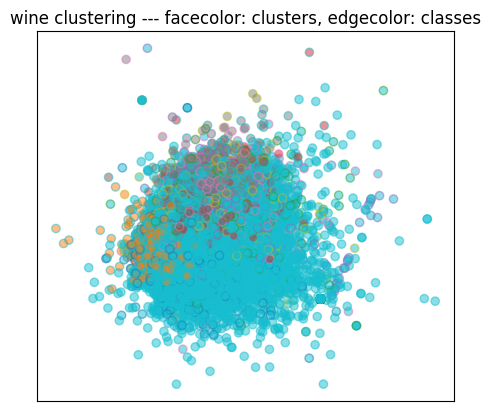

In [77]:
# compute a PCA embedding for visualization
pca = PCA(n_components=2).fit(X_tensor)
Z = pca.transform(X_tensor)

# Define the colormap
cmap = plt.get_cmap('tab10')

plt.title('wine clustering --- facecolor: clusters, edgecolor: classes')
plt.scatter(Z[:,0], Z[:,1], facecolor=cmap(2*y.numpy() + 1), edgecolor= cmap(2*ytrue.numpy()), alpha=.5)
plt.gca().set_aspect('equal')
plt.xticks([]), plt.yticks([])
plt.show()

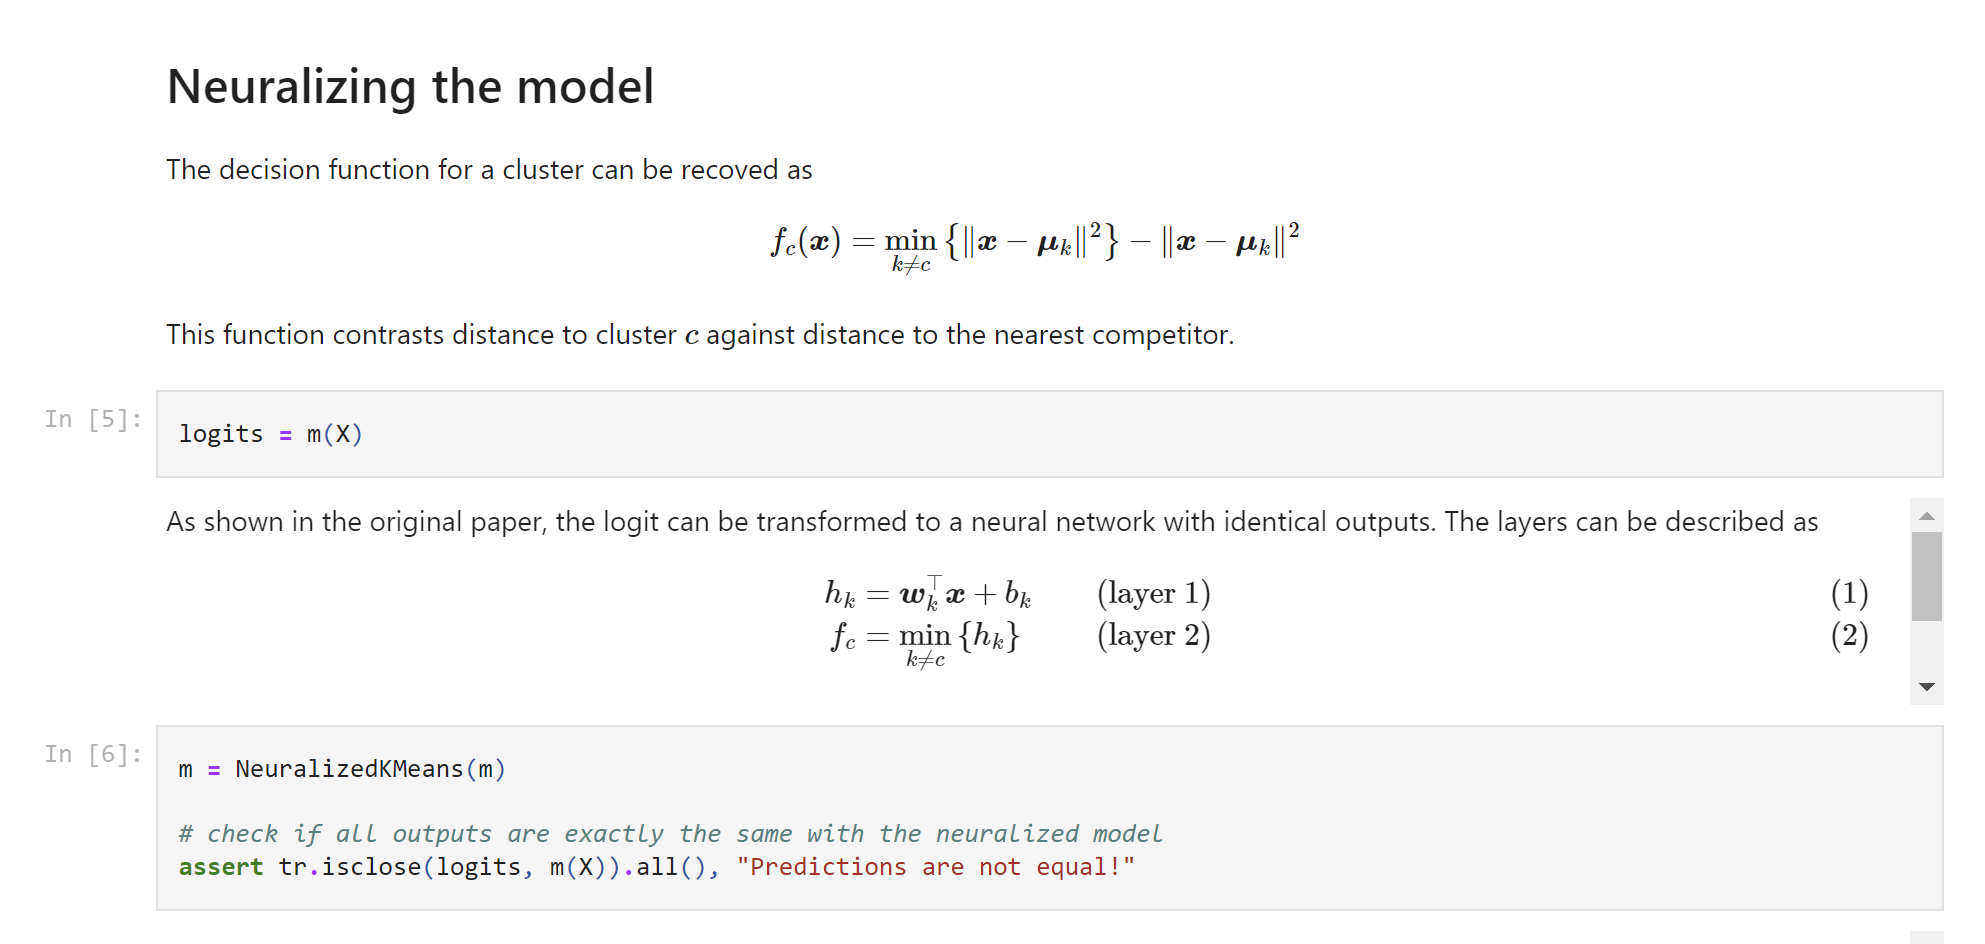

In [78]:
logits=model(X_tensor)

In [79]:
logits

tensor([0.0121, 0.0647, 0.1441,  ..., 0.0435, 0.0497, 0.0204],
       dtype=torch.float64)

In [80]:
logits.shape

torch.Size([18846])

In [81]:
model

KMeans()

In [82]:
from neon import NeuralizedKMeans, neon


In [83]:
neon_model=NeuralizedKMeans(model)

In [84]:
neon_model

NeuralizedKMeans(
  (kmeans): KMeans()
)

In [85]:
# check if all outputs are exactly the same with the neuralized model
assert tr.isclose(logits, neon_model(X_tensor)).all(), "Predictions are not equal!"

In [86]:
R = neon(neon_model, X_tensor, beta=1)

In [87]:
R.shape

torch.Size([18846, 303])

In [88]:
from utils import *

In [89]:
type(feature_names_)

list

data point 1
  cluster assignment: 6 (probability 0.52)
  true class        : 3
  sum(R) / logit    : 0.0647 / 0.0647


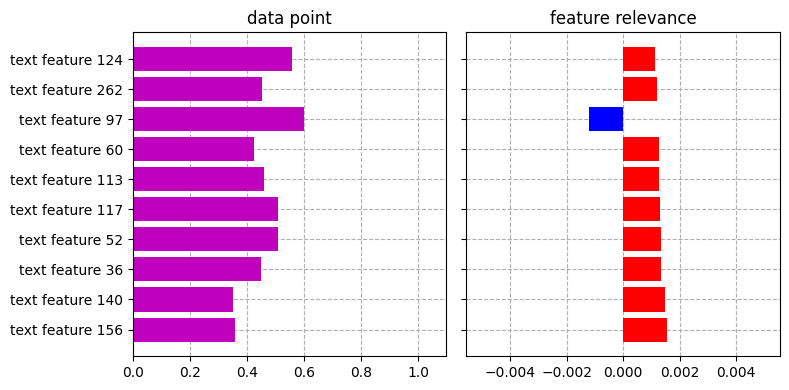

--------------------------------------------------------------------------------
data point 4
  cluster assignment: 2 (probability 0.50)
  true class        : 4
  sum(R) / logit    : 0.0112 / 0.0112


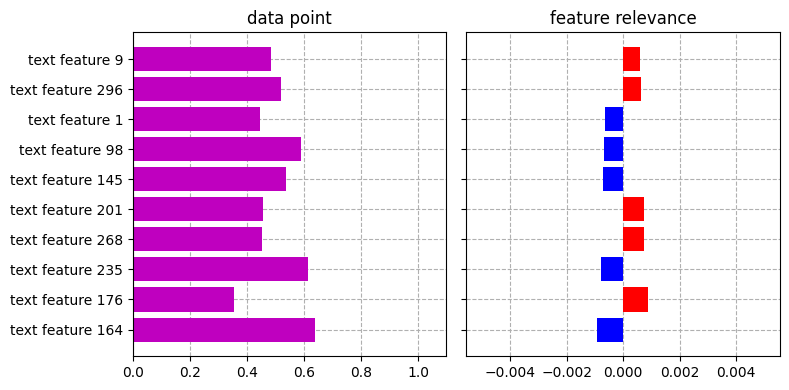

--------------------------------------------------------------------------------
data point 5
  cluster assignment: 14 (probability 0.52)
  true class        : 12
  sum(R) / logit    : 0.0978 / 0.0978


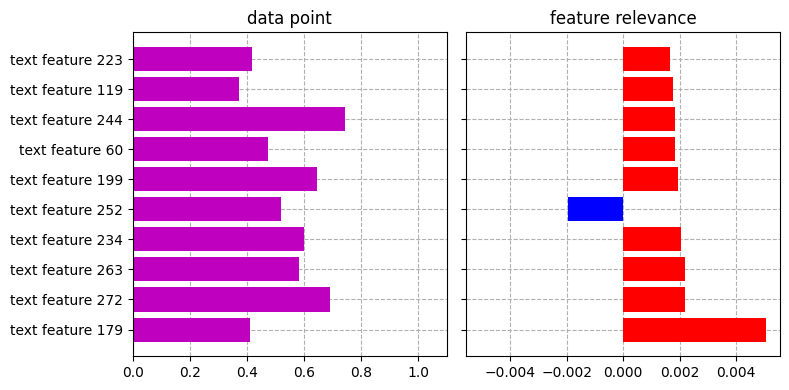

--------------------------------------------------------------------------------


In [91]:
# Assuming you have already imported the required modules and have the data ready
I = tr.nonzero(y != ytrue)[:3, 0]
for i in I:
    logit = logits[i]
    prob = 1 / (1 + tr.exp(-logit))

    print('data point %d' % i)
    print('  cluster assignment: %d (probability %.2f)' % (y[i], prob))
    print('  true class        : %d' % ytrue[i])
    print('  sum(R) / logit    : %.4f / %.4f' % (sum(R[i]), logit))

    plot_explanation(X_tensor[i], R[i], feature_names, vlim=abs(R[I]).max() * 1.1)
    print('-' * 80)



data point 0
  cluster assignment: 10 (probability 0.50)
  true class        : 10
  sum(R) / logit    : 0.0121 / 0.0121


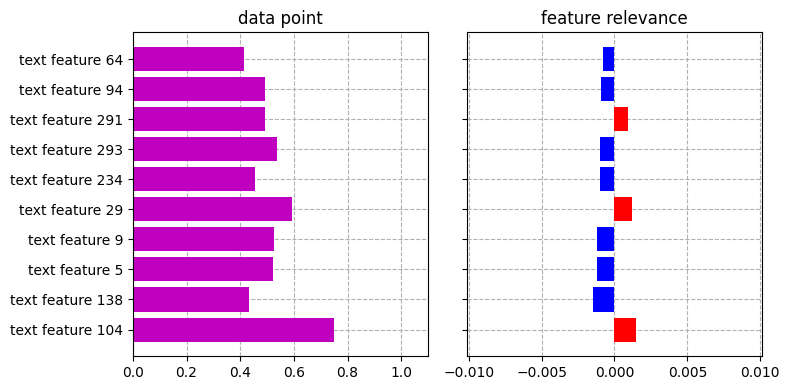

--------------------------------------------------------------------------------
data point 2
  cluster assignment: 17 (probability 0.54)
  true class        : 17
  sum(R) / logit    : 0.1441 / 0.1441


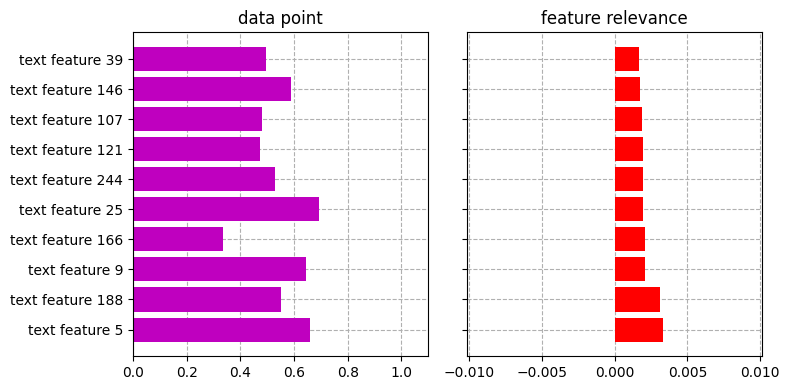

--------------------------------------------------------------------------------
data point 3
  cluster assignment: 3 (probability 0.60)
  true class        : 3
  sum(R) / logit    : 0.3938 / 0.3938


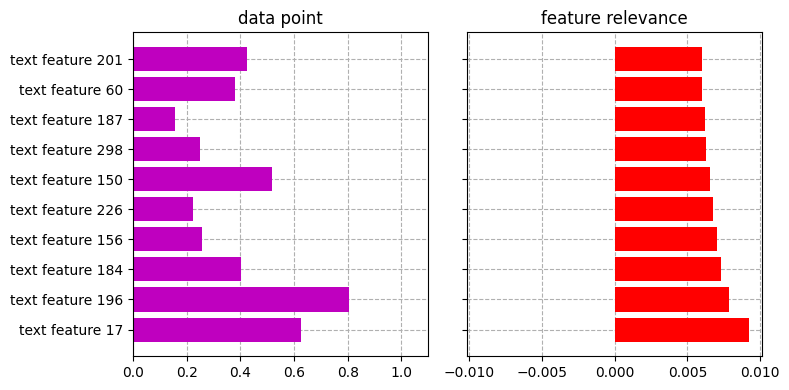

--------------------------------------------------------------------------------


In [92]:
I = tr.nonzero(y == ytrue)[:3,0]
for i in I:
    logit = logits[i]
    prob = 1 / (1 + tr.exp(-logit))

    print('data point %d'%i)
    print('  cluster assignment: %d (probability %.2f)'%(y[i],prob))
    print('  true class        : %d'%ytrue[i])
    print('  sum(R) / logit    : %.4f / %.4f'%(sum(R[i]), logit))
    plot_explanation(X_tensor[i], R[i], feature_names_, vlim=abs(R[I]).max()*1.1)
    plt.show()
    print('-'*80)